In [2]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

# Unidad 1 - Introducción y Conceptos Básicos  

## ¿Qué es la identificación de sistemas?

CONCEPTO 1 - Es el conjunto de herramientas y experimentos que se diseñan y utilizan para lograr aproximar un modelo matemático de un sistema dinámico sobre el cuál se pueden realizar mediciones de sus entradas y salidas.

CONCEPTO 2 - Uso de métodos estadísticos para lograr la aproximación de un modelo matemático de un sistema cuya información paramétrica es desconocida parcial o totalmente, y del cual se cuenta con mediciones de las variables de interés.

En la siguiente figura podemos observar el proceso en términos muy generales del paso a paso para seguir la identificación de un sistema desconocido parcialmente (grey-box) o totalmente desconocido (black-box).

![R - Experimento](figuras/03_proceso_identif.gif)

## Ejemplo familiar estimación de una resistencia  

Partiendo del desconocimiento del valor de una R, se cuenta únicamente con los valores de las señales de interés que son el voltaje y la corriente. Y esperando aproximar aún mejor el modelo se toma un número N de mediciones. La lógica indica que a medida que el valor de N es más grande se espera mayor aproximación al valor real desconocido.  

![R - Experimento](figuras/01_ejemplo_R.png)

El resultado del experimento puede ser similar a las siguientes señales, aunque las mediciones mostradas aquí oscilan alrededor de un valor determinado (50V y 10A), pero no necesariamente debió ser así.  

![Senales_VI](figuras/voltaje_corriente.png)

La ley de ohm brinda una herramienta matemática que permite estimar un valor para el modelo del sistema desconocido.
Si se observa la dispersión de las variables todos los valores deberían converger al mismo punto, sin embargo se han tenido en cuenta errores en las mediciones realizadas (perturbaciones del sistema).  

![Dispersion_VI](figuras/dispersion_vi.png)

**Dos métodos sencillos para realizar una estimación**

**1. Aproximación simple:**

En este tipo de aproximación se promedian los valores de la Resistencia que se obtuvieron en cada experimento realizado.

\begin{equation}
R_1[N] = \frac{1}{N}\sum_{k=1}^{N}\frac{V[k]}{I[k]}
\end{equation}  

**2. Error en cada variable:**

En este tipo de aproximación se promedia el valor cada variable y luego se calcula el valor de la resistencia aplicando la Ley de Ohm.

\begin{equation}
R_2[N] = \frac{\frac{1}{N}\sum_{k=1}^{N}V[k]}{\frac{1}{N}\sum_{k=1}^{N}I[k]}
\end{equation} 

**3. BONUS Mínimos cuadrados (optimizando)**

En este caso la idea es encontrar R[N] minimizando la suma de la diferencia de cuadrados del modelo estimado basado en la medición de intensidad y la propia medición de tensión (función de costo). La ecuación a minimizar sería:

\begin{equation}
R_3[N] = arg min\sum_{k=1}^{N}\left(RI[k]-V[k]\right)^2
\end{equation} 

Derivar esta función de costo respecto de R puede ser un ejercicio muy interesante, ¡intente desarrollarlo en clase!. 

La función a minimizar (Hacer la derivada) e igualando a cero, se puede obtener la aproximación de R estimada que es lo que realmente interesa:

\begin{equation}
R_3[N] = \frac{\frac{1}{N}\sum_{k=1}^{N}I[k] \cdot V[k]}{\frac{1}{N}\sum_{k=1}^{N}I[k]^2}
\end{equation} 

## Estimación usando Listas 

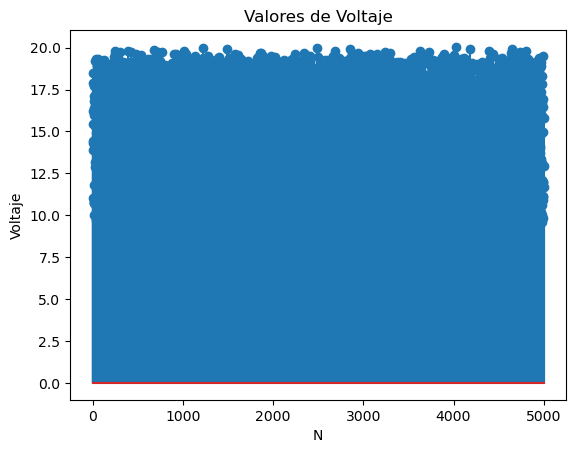

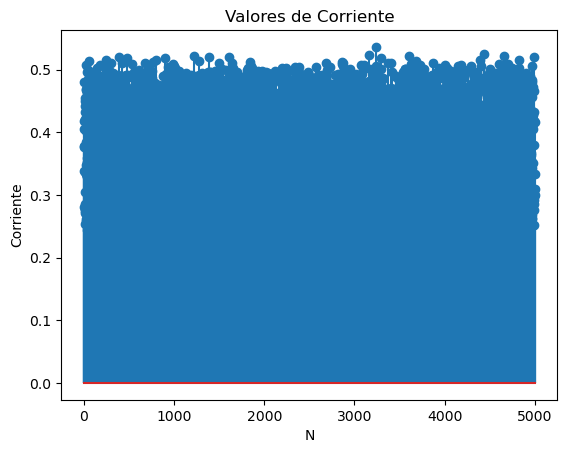

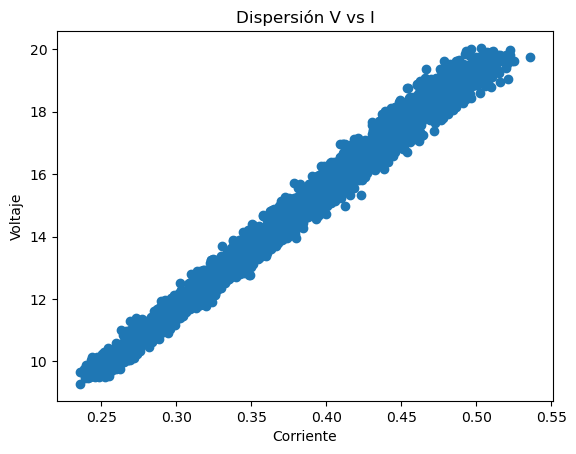

In [11]:
# Datos a utilizar señales vk, ik, N (numero de muestras)
vk = []
ik = []
N = 5000

# Variables necesarias para el proceso
Nk = []
V_p = I_p = P_p = k = 0;
R1 = R2 = R3 = 0;
# Se supone que Rv es desconocido, pero para garantizar que el ejercicio tenga coherencia
# debemos definirlo de forma aleatoria para luego simplemente decir que I=V/R
Rv = random.randrange(10,50);

for k in range(N):
    Nk.append(k+1)
    e1 = np.random.normal(0,0.02,size=1)
    vk.append(random.randrange(10,20)*(1+e1))
    e2 = np.random.normal(0,0.02,size=1)
    ik.append((vk[k]/Rv)*(1+e2))

plt.stem(Nk,vk)
plt.xlabel('N')
plt.ylabel('Voltaje')
plt.title('Valores de Voltaje')
plt.show()

plt.stem(Nk,ik)
plt.xlabel('N')
plt.ylabel('Corriente')
plt.title('Valores de Corriente')
plt.show()

plt.scatter(ik,vk)
plt.xlabel('Corriente')
plt.ylabel('Voltaje')
plt.title('Dispersión V vs I')
plt.show()

**Aproximación simple**

\begin{equation}
R_1[N] = \frac{1}{N}\sum_{k=1}^{N}\frac{V[k]}{I[k]}
\end{equation}  

In [12]:
# Aproximación simple calcular R1
R1 = R2 = R3 = k = 0

# Suma acumulada de la división de cada vk por ik
for k in range(N):
    R1 = R1+(vk[k]/ik[k])

# Dividir en el num de datos
R1 = R1/N

print("Aproximación simple: "+str(R1))

Aproximación simple: [39.02521292]


**Error en cada variable:**

\begin{equation}
R_2[N] = \frac{\frac{1}{N}\sum_{k=1}^{N}V[k]}{\frac{1}{N}\sum_{k=1}^{N}I[k]}
\end{equation} 

In [13]:
# Error en cada Variable
k = V_p = I_p = P_p = 0

V_p = sum(vk)/len(vk)
I_p = sum(ik)/len(ik)
R2 = V_p/I_p
print("Error en variable: "+str(R2))

Error en variable: [39.00706888]


**Mínimos cuadrados (LS):**

\begin{equation}
R_3[N] = \frac{\frac{1}{N}\sum_{k=1}^{N}I[k] \cdot V[k]}{\frac{1}{N}\sum_{k=1}^{N}I[k]^2}
\end{equation} 

In [14]:
# Mínimos cuadrados
temp = k = 0
for k in range(N):
    P_p = P_p + vk[k]*ik[k]
    temp = temp + ik[k]*ik[k]
P_p = P_p/len(vk)
temp = temp/len(ik)
R3 = P_p/temp
print("Minimos cuadrados: "+str(R3))

Minimos cuadrados: [38.98971805]
